### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [97]:
# Loading data into dataframes
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [98]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [99]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [100]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [101]:
# Importing libraries
library(ggplot2)

In [102]:
# Create copies of each dataframe and drop columns(Gender, Birth.Year) that wont be used for these specific questions
ny_df <- ny[c(1:7)]
chi_df <- chi[c(1:7)]
wash_df <- wash

In [103]:
# Combine datasets and add column for identifying city/original dataset
df_list <- c('ny_df', 'wash_df','chi_df')
combined_df = do.call(rbind, lapply(df_list, function(x) cbind(get(x), Source=x)))
combined_df = na.omit(combined_df)

### Question 1

**When is the most popular time for starting trips?**
* **Most popular time of day?**
* **Most popular day of the week?**
* **Most popular month of the year?**

In [104]:
# Function that extracts specific parts of time depending on the provided choice 
# and returns the hour, day of the week, or month.
extract.time = function(time, choice){

    time <- strptime(time, "%Y-%m-%d %H:%M:%S")
    if (choice == 'hour'){
        hour = format(as.POSIXct(time), format = "%H")
        return(hour)
    } else if(choice == 'day'){
        day = weekdays(as.Date(time))
        return(day)
    } else {
        month = format(as.POSIXct(time), format = "%b")
        return(month)
    }
}

In [105]:
# Using extract.time function to create new columns of Start.Time for each possible choice and add to combined_df datafram
times_list = c("hour", "day", "month")

for (choice in times_list){
    combined_df[choice] = extract.time(combined_df$Start.Time, choice)
}

In [106]:
# Contingency table to take a look at the total count of users/hour based on Start.Time
table(combined_df$hour, combined_df$Source)

    
     ny_df wash_df chi_df
  00   436     227     55
  01   231    3500     26
  02   152    3421     18
  03    60    3655     16
  04    84    4541     17
  05   312    6741     67
  06  1212    6994    243
  07  2512    8490    560
  08  4337    9805    693
  09  3521    5957    385
  10  2471    4788    320
  11  2643    5057    467
  12  2866    5569    482
  13  3054    1906    530
  14  3157    1774    466
  15  3356    2136    599
  16  3893    2746    804
  17  5503    3958   1039
  18  5281    3028    679
  19  3594    1772    435
  20  2437    1181    268
  21  1646     855    237
  22  1214     605    146
  23   797     344     78

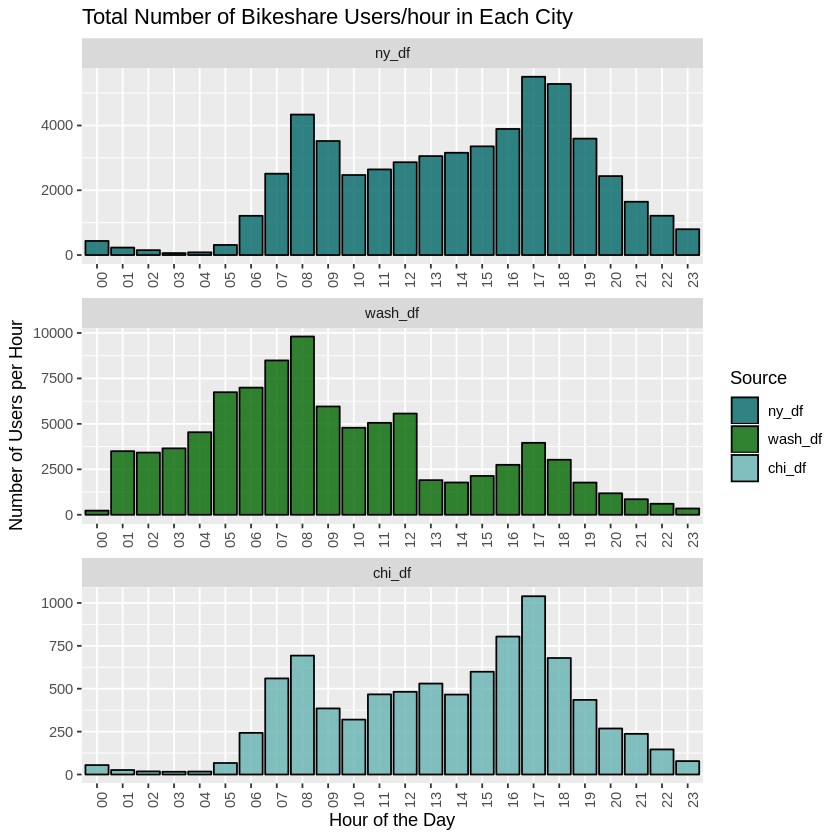

In [107]:
# Create Bar Chart Showing total counts of Users/hour of the day based on Start.Time
ggplot(aes(x = combined_df$hour, fill = Source), data = combined_df) +
    geom_bar(color = 'black', stat = "count") +
    facet_wrap(~Source,scales = "free",ncol=1) +
    scale_fill_manual(values=alpha(c("#006666","#006600","#66b2b2"), 0.8)) +
    theme(axis.text.x = element_text(angle = 90)) +
    ggtitle('Total Number of Bikeshare Users/hour in Each City') +
    xlab('Hour of the Day') +
    ylab('Number of Users per Hour')

After looking at the counts of users per hour I created this bar chart to better show that there is a trend in the number of users per hour in each city with clear peak times at 8AM for mornings and 5PM for afternoons. It is interesting to see that Washington had more users start in the morning while New York and Chicago had more users start in the afternoon.

In [108]:
# Contingency table to take a look at the total count of users/day based on Start.Time
table(combined_df$day, combined_df$Source)

           
            ny_df wash_df chi_df
  Friday     8168   12926   1285
  Monday     7570   11721   1302
  Saturday   6176   12133   1150
  Sunday     6596   11566   1111
  Thursday   8729   13204   1254
  Tuesday    7898   13288   1292
  Wednesday  9632   14212   1236

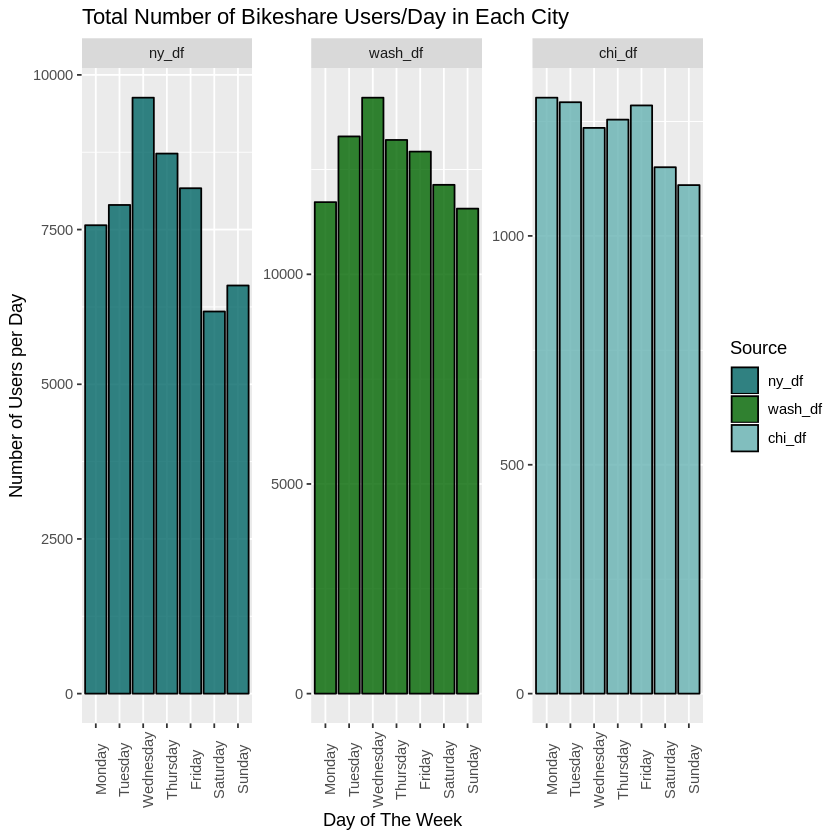

In [109]:
#Creating labels to order x-axis
level_order_days <- c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

# Create Bar Chart Showing total counts of Users/day of the week based on Start.Time
ggplot(aes(x = factor(combined_df$day, level = level_order_days), fill = Source), data = combined_df) +
    geom_bar(color = 'black', stat = "count") +
    facet_wrap(~Source,scales = "free") +
    scale_fill_manual(values=alpha(c("#006666","#006600","#66b2b2"), 0.8)) +
    theme(axis.text.x = element_text(angle = 90)) +
    ggtitle('Total Number of Bikeshare Users/Day in Each City') +
    xlab('Day of The Week') +
    ylab('Number of Users per Day')

The numbers for start times on different days of the week were less clear then hours of the day, but Washington had the most users and Chicago had the least. I created this bar chart to better show the difference in number of users per day. It shows more users start times on Wednesdays for New York and Washington, on Monday for Chicago and there were fewer users starting trips on weekends overall.

In [110]:
# Contingency table to take a look at the total count of users/month based on Start.Time
table(combined_df$month, combined_df$Source)

     
      ny_df wash_df chi_df
  Apr 10661   18522   1526
  Feb  6364   11563    930
  Jan  5745    8946    650
  Jun 13999   20335   2816
  Mar  5820   12612    803
  May 12180   17072   1905

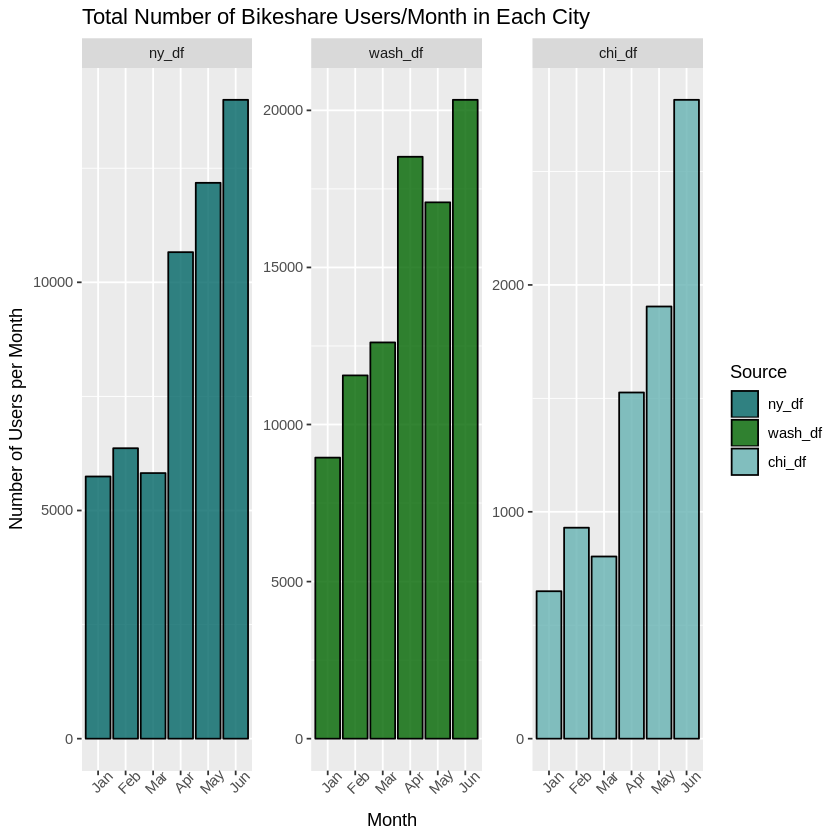

In [111]:
#Creating labels to order x-axis
level_order_month <- c("Jan","Feb","Mar","Apr","May","Jun")

# Create Bar Chart Showing total counts of Users/month based on Start.Time
ggplot(aes(x = factor(combined_df$month, level = level_order_month), fill=Source), data = combined_df) +
    geom_bar(color = 'black', stat = "count") +
    facet_wrap(~Source,scales = "free") +
    scale_fill_manual(values=alpha(c("#006666","#006600","#66b2b2"), 0.8)) +
    theme(axis.text.x = element_text(angle = 45)) +
    ggtitle('Total Number of Bikeshare Users/Month in Each City') +
    xlab('Month') +
    ylab('Number of Users per Month')

After looking at the total counts of users by month there were less for January and March, but the rest of the months were less clear. I created this bar graph to better show the differences by month and there is an obvious upward trend over the year, with lower start times in the colder months of January to March and a large increase in users starting trips from April to June.

**Summary of Question 1:** *When is the most popular time for starting trips?*
*	For the first part of this question I looked at the total number of users per hour in a table and there does appear to be a decrease in the start time around hours 19/7PM as well as 09/9AM in all three cities. There also appear to be generally fewer users starting trips between hours 00/12AM and 05/5AM for New York and Chicago however Washington was less clear after midnight based on numbers alone. Looking at the bar charts of all three cities showed that this trend is similar in all three cities as well as peak start times in the morning being around 08/8AM and around 17/5PM in the afternoon.


*	For the days of the week, the numbers were less clear on peak start times. It did show that Washington had the most users with similar high user numbers in New York and Chicago had the least. Looking at the bar chart there seemed to be similar trends between New York and Washington, perhaps because there is a similar number of users in each city, where peak start time was on Wednesdays and all three cities showed Saturday and Sunday had fewer users starting trips. Chicago seems to have a peak start time on Mondays with a downward trend to the weekend.


*	For months of the year there was only data on the first half of the year, but there seemed to be similar trends in all three cities. The total counts of users starting trips were clearly lower for January and March but the rest of the months were less clear. The bar graph shows an obvious upward trend throughout the year with lower start times in the colder months of January to March and a large increase in users starting trips from April to June.


### Question 2

**What is the average amount of time traveled for users in each city?**

In [112]:
# Converting Trip duration from seconds to Minutes
combined_df$Trip.Duration <- combined_df$Trip.Duration/60

In [113]:
summary(combined_df$Trip.Duration)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    1.000     6.533    11.117    18.308    19.312 18143.900 

In [114]:
by(combined_df$Trip.Duration, combined_df$Source, summary)

combined_df$Source: ny_df
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    1.017     6.133    10.167    15.060    17.517 18143.900 
------------------------------------------------------------ 
combined_df$Source: wash_df
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    1.005     6.848    11.783    20.566    20.554 15076.523 
------------------------------------------------------------ 
combined_df$Source: chi_df
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    6.571   11.167   15.620   18.650 1423.467 

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 9 rows containing non-finite values (stat_bindot).”

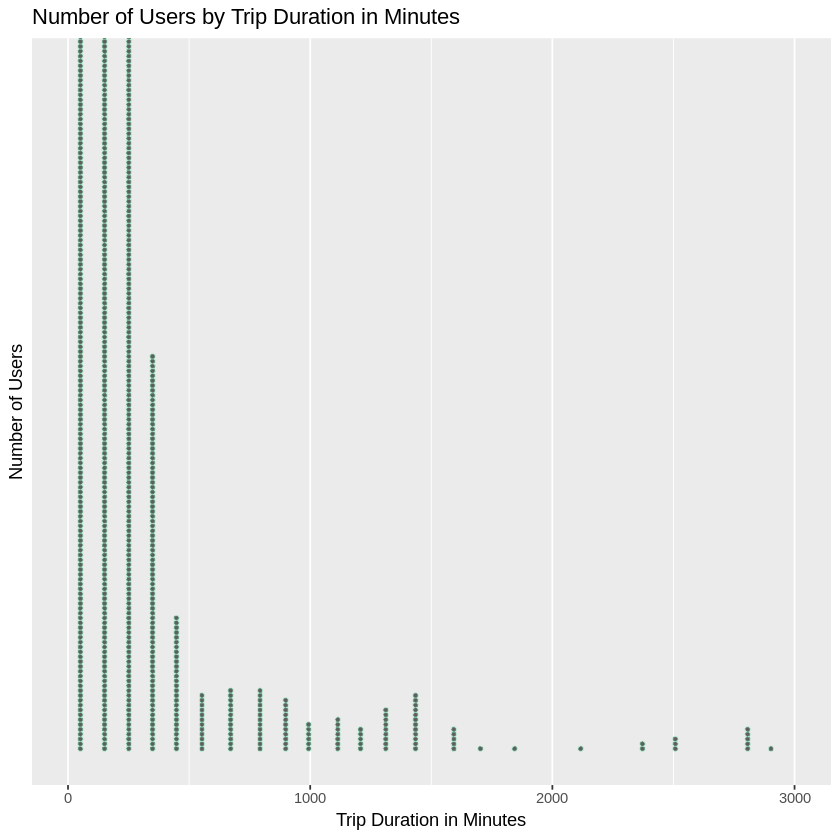

In [115]:
# Create a dotplot of Trip.Duration with some outliers removed
ggplot(aes(x=Trip.Duration), data = combined_df) +
    geom_dotplot(dotsize = 0.2, color = "#88d8b0", alpha = .6) +
    scale_y_continuous(breaks = NULL) +
    scale_x_continuous(labels = scales::comma, breaks = seq(0,3000,100))+
    xlim(0,3000) +
    ggtitle('Number of Users by Trip Duration in Minutes') +
    xlab('Trip Duration in Minutes') +
    ylab('Number of Users')

I created this dotplot to see where most of the data lies with only a few of the more extreme outliers removed for a zoomed in look. This graph shows that a large majority of users trip duration falls well under 1000 minutes.

In [116]:
# Calculate the 99th percentile Trip.Duration to later remove more outliers 
quantile(combined_df$Trip.Duration, 0.99)

99% 
121.8425

Warning message:
“Removed 1585 rows containing non-finite values (stat_boxplot).”

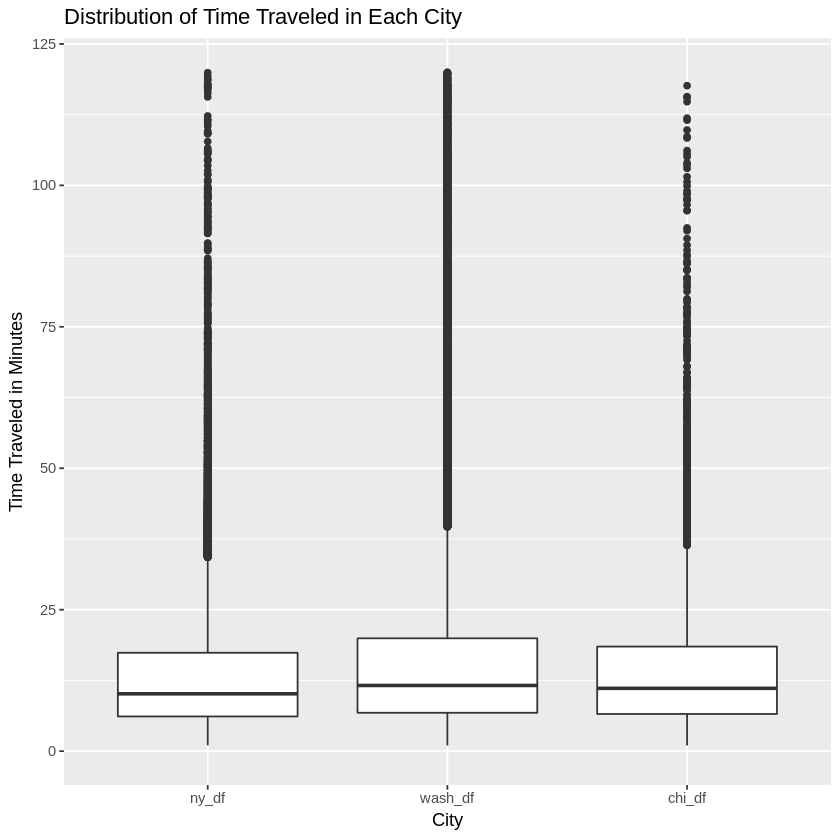

In [117]:
# Create Boxplot of Trip Duration with top 1% removed
ggplot(aes(x = Source, y = Trip.Duration),data = combined_df) +
    geom_boxplot() +
    ylim(0,120) +
    xlab(label = "City") +
    ylab(label = "Time Traveled in Minutes") +
    labs(title = "Distribution of Time Traveled in Each City")

To better look at the distribution of Time Traveled in each city with top 1% of outliers removed based on the calculation above. This shows that all three cities seem to have a similar distribution in trip duration with Washington being just slightly longer.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1585 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”

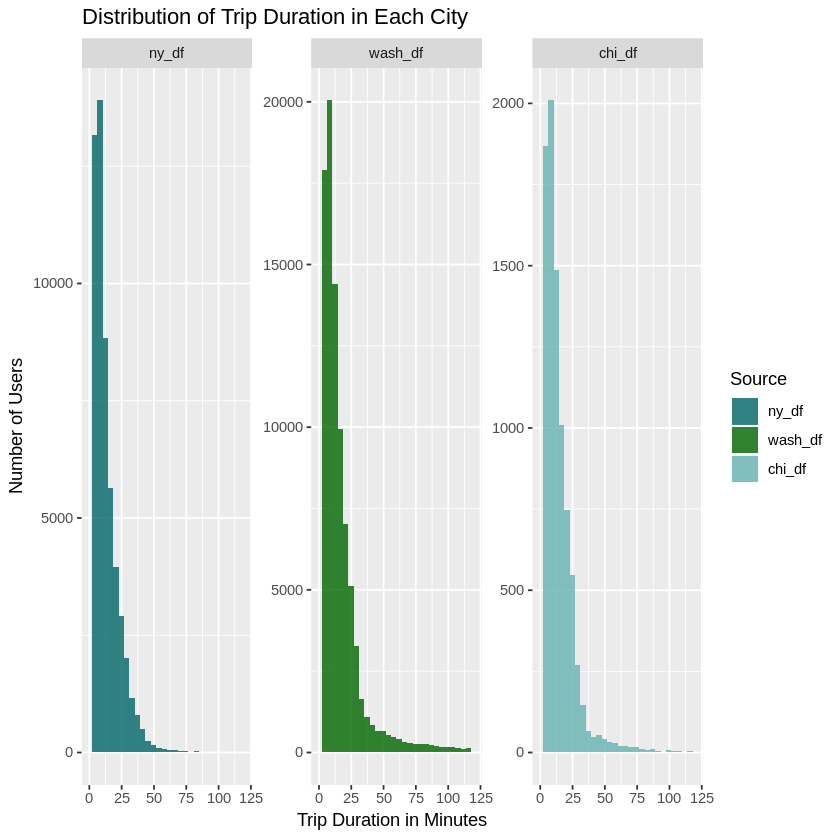

In [118]:
# Create Histogram of Trip Duration with top 1% removed
ggplot(aes(x = Trip.Duration, fill=Source), data = combined_df) +
    geom_histogram() +
    xlim(0,120) +
    facet_wrap(~Source,scales = "free") +
    scale_fill_manual(values=alpha(c("#006666","#006600","#66b2b2"), 0.8)) +
    ggtitle('Distribution of Trip Duration in Each City') +
    xlab(label ='Trip Duration in Minutes') +
    ylab(label ='Number of Users')

Since the boxplot showed all three cities to be quite similar I created histograms of each city to better see the distribution of trip duration in each city, again with the top 1% of outliers removed. With this I could see that there are slightly more users taking trips longer then 50 minutes in Washington and Chicago compared to New York. 

**Summary of question 2:** *What is the average amount of time traveled for users in each city?* 


> To start answering this question I looked at the overall statistical summary of trip duration in minutes and found that user trip durations skewed heavily with the majority of trip durations staying under 20 minutes and longer trips being extremely long in comparison, with the max trip duration being in the thousands of minutes. The average trip length was also at 18 minutes but when split between each city this average decreased to 15 minutes for Chicago and New York. 

> To better see the distribution of trip duration for each city I calculated that 99% of trips fell under about 120 minutes and graphed a dot plot to visualize this. In the boxplot below, I graphed up to 99% of the trip duration to remove those more extreme outliers. All three cities seemed to have a similar distribution in trip duration with Washington being just slightly longer. 

> Finally to get a better picture of how skewed the data was I plotted a histogram of each city’s trip duration in minutes with the top 1% of trip lengths removed. With this, it is clear that all three cities are heavily skewed to the right with a large majority of users taking trips less than 25 minutes long and slightly more users in Washington and Chicago taking longer trips up to 120 minutes compared to New York.


### Question 3

**Is there a time of day/week/year that has longer trip durations based on when the trip is started for each city?**

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1585 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 1585 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1585 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1585 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1585 rows containing non-finite values (stat_summary).”

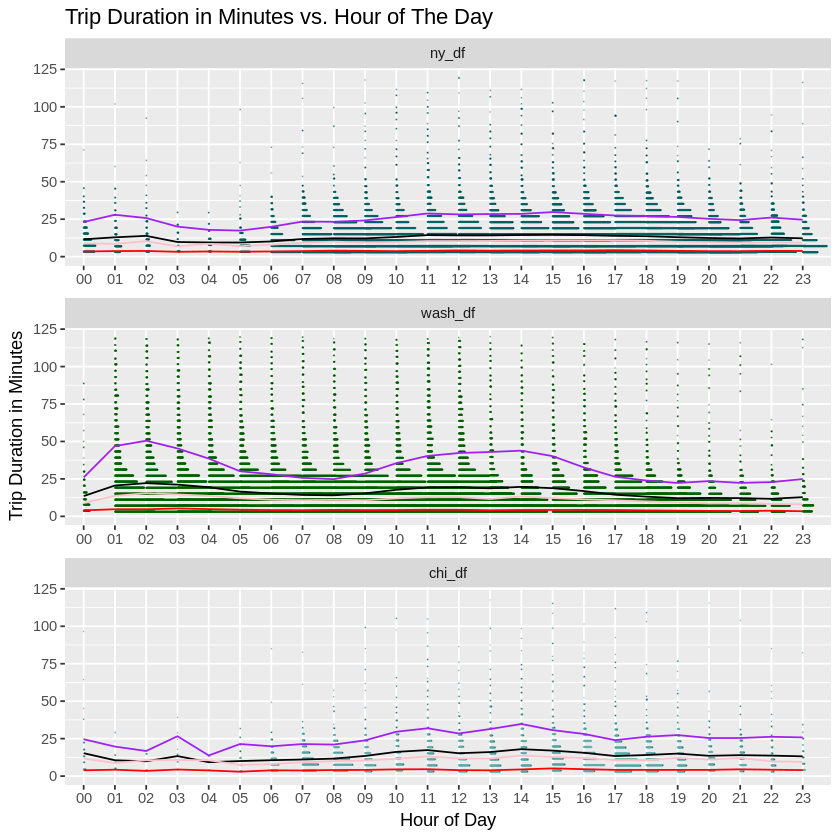

In [119]:
# Create Dot-plot to compare starting travel time by hour with trip duration
ggplot(aes(x = combined_df$hour, y = Trip.Duration, color = Source), data = combined_df) +
    geom_dotplot(binaxis = 'y', dotsize = 1/60, alpha=.3) +
    ylim(0,120) +
    guides(color = FALSE) +
    geom_line(aes(group = Source), stat = "summary", fun.y = mean, color = "black") +
    geom_line(aes(group = Source), stat = 'summary', fun.y = quantile,
        fun.args = list(probs = .9), color = "purple" ) +
    geom_line(aes(group = Source), stat = 'summary', fun.y = quantile,
        fun.args = list(probs = .5), color = "pink") +
    geom_line(aes(group = Source), stat = 'summary', fun.y = quantile,
        fun.args = list(probs = .1), color = "red") +
    facet_wrap(~Source, scales = "free",ncol=1) +
    scale_color_manual(values=(c("#006666","#006600","#66b2b2"))) +
    ggtitle('Trip Duration in Minutes vs. Hour of The Day') +
    xlab('Hour of Day') +
    ylab('Trip Duration in Minutes')

Here is a dotplot with statistical summary overaly which zooms in on 99% of the data by removing the top 1% of trip duration. It shows a slight increase in trip duration at different hours of the day in each city, but may be due to less number of users at those times and overall there is no significant or minimal effect on trip duration based on hour of the day with the effect being most pronounced in Washington and least pronounced in New York.

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1585 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 1585 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1585 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1585 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1585 rows containing non-finite values (stat_summary).”

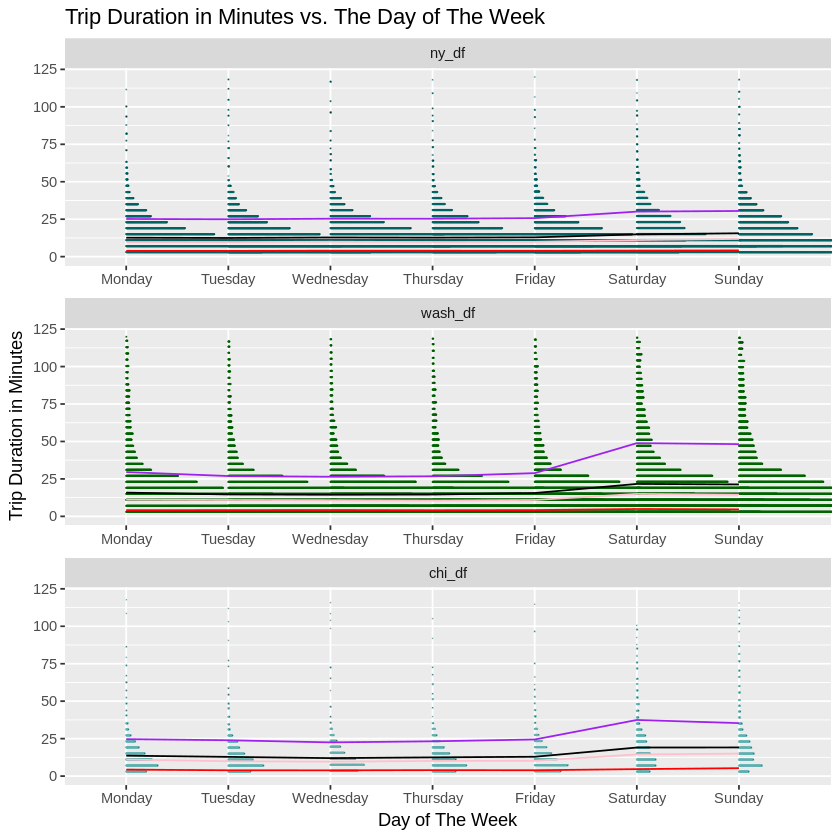

In [120]:
# Create Dot-plot to compare starting travel time by day with trip duration
ggplot(aes(x = factor(combined_df$day, levels = level_order_days), y = Trip.Duration, color = Source), data = combined_df) +
    geom_dotplot(binaxis = 'y', dotsize = 1/60, alpha=.4) +
    ylim(0,120) +
    guides(color = FALSE) +
    geom_line(aes(group = Source), stat = "summary", fun.y = mean, color = "black") +
    geom_line(aes(group = Source), stat = 'summary', fun.y = quantile,
        fun.args = list(probs = .9), color = "purple" ) +
    geom_line(aes(group = Source), stat = 'summary', fun.y = quantile,
        fun.args = list(probs = .5), color = "pink") +
    geom_line(aes(group = Source), stat = 'summary', fun.y = quantile,
        fun.args = list(probs = .1), color = "red") +
    facet_wrap(~Source, scales = "free",ncol=1) +
    scale_color_manual(values=(c("#006666","#006600","#66b2b2"))) +
    ggtitle('Trip Duration in Minutes vs. The Day of The Week') +
    xlab('Day of The Week') +
    ylab('Trip Duration in Minutes')

This graph is similar to the one above but for day of the week and shows that all three cities had slightly longer trip durations on weekends, with New York showing the least effect and Washington and Chicago showing slightly more.

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1585 rows containing non-finite values (stat_bindot).”Warning message:
“Removed 1585 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1585 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1585 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1585 rows containing non-finite values (stat_summary).”

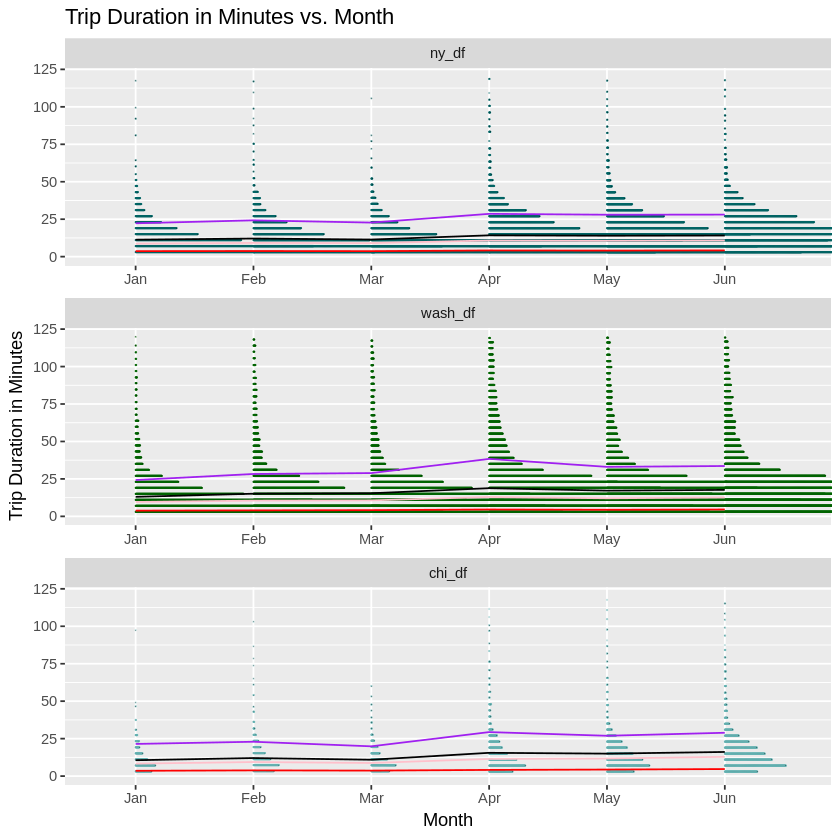

In [121]:
# Create Dot-plot to compare starting travel time by month with trip duration
ggplot(aes(x = factor(combined_df$month, levels = level_order_month), y = Trip.Duration, color = Source), data = combined_df) +
    geom_dotplot(binaxis = 'y', dotsize = 1/60, alpha=.4) +
    ylim(0,120) +
    guides(color = FALSE) +
    geom_line(aes(group = Source), stat = "summary", fun.y = mean, color = "black") +
    geom_line(aes(group = Source), stat = 'summary', fun.y = quantile,
        fun.args = list(probs = .9), color = "purple" ) +
    geom_line(aes(group = Source), stat = 'summary', fun.y = quantile,
        fun.args = list(probs = .5), color = "pink") +
    geom_line(aes(group = Source), stat = 'summary', fun.y = quantile,
        fun.args = list(probs = .1), color = "red") +
    facet_wrap(~Source, scales = "free",ncol=1) +
    scale_color_manual(values=(c("#006666","#006600","#66b2b2"))) +
    ggtitle('Trip Duration in Minutes vs. Month') +
    xlab('Month') +
    ylab('Trip Duration in Minutes')

This graph is similar to the dotplots above but showing available data on monthe of the year. The graph shows similar trends as with day of the week and hour of the day, with Chicago and Washington’s trip durations being slightly more affected by month and New York showing almost no effect.

**Summary of question 3:** *Is there a time of day/week/year that has longer trip durations based on when the trip is started for each city?*

To see how the start time of a trip in each city effected trip duration I created dotplots with a statistical summary shown in line graphs for each city and for each start time as the hour of the day, day of the week, and month of the year. 
    
* In the graph for hours of the day there appeared to be a slight increase in all three cities but at different hours of the day. New York had a very slight increase in trip duration at 1AM with a dip leading up to 4AM based on the majority of users having trip durations shown in the dashed purple line(90%), and again going up after 6AM where it stayed fairly level throughout the rest of the day. However the number of users at these times were much less then the number of users at other times of the day and could be why these hours seemed to have an increase in trip duration, less trips overal but the trips were longer in duration. The average trip duration is shown as the solid black line, the dotted line shows the median, and 10% of users are shown as the dashed red line. These showed that there was almost no effect on trip duration based on hour of the day. 

  Washington and Chicago do seem to have trip duration be slightly more effected by the hour of the day. Both the median and mean showed a slight effect on trip duration and 90% of trips were more effected by the hour of the day with an increase in trip duration happening at 1PM in Washington and 2PM in Chicago as well as an increase at 2AM for Washington and 3AM for Chicago. Overall it would appear the duration of a trip was only slightly effected by the hour of the day for each city with Washington being the most effected and New York being the least.


* The graph for the day of the week had similar trends as the hour of the day where New York only showed a slight to almost no effect on trip duration from the day of the week while Chicago and Washington’s trip durations were more obviously effected by day of the week. All three cities had longer trip durations on Saturdays and Sundays compared to the rest of the week.

* Finally for the month of the year there were similar trends with Chicago and Washington’s trip durations being slightly more effected by month and New York showing almost no effect. All three cities had shorter trip durations in January and March with April May and June having longer trip durations. Overall there seemed to be only a slight effect on trip duration based on time of day, day of the week, and month of the year. With hour of the day and weekends having the biggest effect in all three cities. The number of users at these times were also less then the number of users at other times and could be why there appears to be an effect on trip duration based on time.

In [122]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')